In [4]:
import pyalps
import numpy as np
import matplotlib.pyplot as plt
import pyalps.plot
from subprocess import call

In [7]:
def dmrg_run(g, w, O, sweeps=4, number_eigenvalues=1, max_states=100, n_sites=10, boson_trunc=5, use_RWA=False, plot_sweeps=False):
    
    call('rm parm_*', shell=True)
    
    prefix = 'parm_' + 'dicke_hubbard'
    
    if use_RWA == True:
        model = 'dicke hubbard RWA'
    else:
        model = 'dicke hubbard'
    
    parms = [{
        'LATTICE_LIBRARY'           : 'lattices.xml',
        'LATTICE'                   : 'chain lattice with 2-site unit cell',
        'MODEL_LIBRARY'             : 'models.xml',
        'MODEL'                     :  model,
        'local_S'                   : '1/2',
        'Emax'                      : 10,
        'w'                         : w,
        'O'                         : O,
        'g'                         : g,
        'L'                         : n_sites,
        'boson_trunc'               : boson_trunc,
        'MEASURE[Entropy]'          : True,
        'MEASURE[EnergyVariance]'   : True,
        'SWEEPS'                    : sweeps,
        'NUMBER_EIGENVALUES'        : number_eigenvalues,
        'MAXSTATES'                 : max_states,
    }]
    
    for i in range(n_sites/2):
        parms[0]['MEASURE_LOCAL_AT[n_%d]' % (2*i+1)] = 'n|(%d)' % (2*i+1)
        parms[0]['MEASURE_LOCAL_AT[Sz_%d]' % (2*i+2)] = 'Sz|(%d)' % (2*i+2)
    
    
    if use_RWA == True:
        parms[0]['CONSERVED_QUANTUMNUMBERS'] = 'E'
        parms[0]['E_total'] = 10

    input_file = pyalps.writeInputFiles(prefix, parms)
    res = pyalps.runApplication('dmrg', input_file, writexml=True)
    
    resfiles = pyalps.getResultFiles(prefix=prefix)
    
    data = pyalps.loadEigenstateMeasurements(resfiles,)
    for c in data[0]:
        print c.y
    
    if plot_sweeps == True:
        iter = pyalps.loadMeasurements(resfiles,
                                       what=['Iteration Energy','Iteration Truncation Error'])

        plt.figure()
        pyalps.plot.plot(iter[0][1])
        plt.title('Iteration history of ground state energy')
        plt.ylabel('$E_0$')
        plt.xlabel('iteration')

        plt.figure()
        pyalps.plot.plot(iter[0][1])
        plt.title('Iteration history of truncation error')
        plt.yscale('log')
        plt.ylabel('error')
        plt.xlabel('iteration')

        plt.show()
    
    # return e0, trunc_error

In [8]:
dmrg_run(0.3, 1.0, 0.5, n_sites=4, use_RWA=True, plot_sweeps=False)

dmrg parm_dicke_hubbard.in.xml --write-xml
[ 1.25]
[  6.32101032e-17]


In [46]:
def dmrg_sweep(g_range, w, O, **params):
    e0s, trunc_errors = [], []
    for i in range(len(g_range)):
        print("Running iteration %d" % i)
        g = g_range[i]
        e0, trunc_error = dmrg_run(g, w, O, **params)
        e0s.append(e0)
        trunc_errors.append(trunc_error)
    return e0s, trunc_errors

# DMRG for finding the Dicke-Hubbard phase diagram

For 10 sites and truncating the boson number to 5 per site, it takes 21 seconds using the RWA. Without using RWA, it takes 127 seconds...

- check if boson number can be truncated to less than 5

- check if RWA can be used

- increase number of sites gradually

Running iteration 0
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 1
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 2
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 3
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 4
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 5
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 6
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 7
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 8
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 9
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 10
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 0
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 1
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 2
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 3
dmrg parm_dicke_hubbard.in.xml --write-xml
Running iteration 4
dmrg parm_dicke_hubbard.in.xml --w

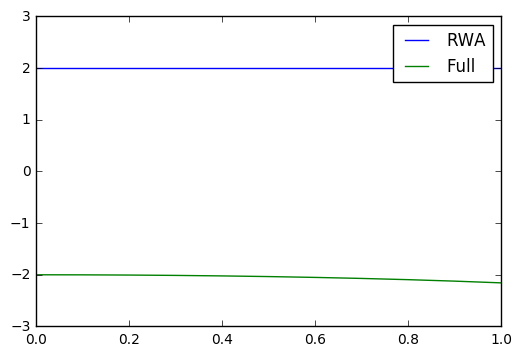

In [47]:
w = 1.0
O = 0.8

g_range = np.linspace(0.0, 1.0, 11)

e0_rwa, trunc_error_rwa = dmrg_sweep(g_range, w, O, use_RWA=True, n_sites=10)

e0, trunc_error = dmrg_sweep(g_range, w, O, use_RWA=False, n_sites=10)

plt.plot(g_range, e0_rwa, label="RWA")
plt.plot(g_range, e0, label="Full")
plt.legend()
plt.show()

In [175]:
pyalps.loadEigenstateMeasurements?